In [1]:
import os

In [2]:
import numpy as np
import pandas as pd

In [3]:
current_directory = os.getcwd()

In [4]:
df = pd.read_csv(os.path.join(current_directory, 'data', 'train_data.csv'))

In [5]:
df

,phi,a,c,b,h,t,l,fw,ID,a/b,a/c,c/b,t/a,h/a,a^2,b^2,c^2,l^2
0,0.007405,0.35,0.350000,0.700000,64.0,1.0,0.350000,1.135007,0.0,0.500,1.00,0.50,2.857143,182.857143,0.1225,0.490000,0.122500,0.122500
1,0.007405,0.65,0.650000,6.500000,64.0,1.0,0.650000,1.093783,0.0,0.100,1.00,0.10,1.538462,98.461538,0.4225,42.250000,0.422500,0.422500
2,0.007405,0.30,0.300000,3.000000,64.0,1.0,0.300000,1.055009,0.0,0.100,1.00,0.10,3.333333,213.333333,0.0900,9.000000,0.090000,0.090000
3,0.007405,0.25,0.250000,1.000000,64.0,1.0,0.250000,1.061839,0.0,0.250,1.00,0.25,4.000000,256.000000,0.0625,1.000000,0.062500,0.062500
4,0.007405,0.35,0.350000,1.000000,64.0,1.0,0.350000,1.094954,0.0,0.350,1.00,0.35,2.857143,182.857143,0.1225,1.000000,0.122500,0.122500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770860,0.968667,0.75,0.600000,2.000000,64.0,1.0,0.521514,1.115840,3.0,0.375,1.25,0.30,1.333333,85.333333,0.5625,4.000000,0.360000,0.271977
770861,2.110095,0.55,0.343750,1.145833,64.0,1.0,0.255239,1.111252,3.0,0.480,1.60,0.30,1.818182,116.363636,0.3025,1.312934,0.118164,0.065147
770862,2.884977,0.35,0.175000,0.875000,64.0,1.0,0.170720,1.070369,3.0,0.400,2.00,0.20,2.857143,182.857143,0.1225,0.765625,0.030625,0.029145
770863,1.523673,0.50,0.714286,7.142857,64.0,1.0,0.499717,1.080332,3.0,0.070,0.70,0.10,2.000000,128.000000,0.2500,51.020408,0.510204,0.249717


In [6]:
df.columns

Index(['phi', 'a', 'c', 'b', 'h', 't', 'l', 'fw', 'ID', 'a/b', 'a/c', 'c/b',
       't/a', 'h/a', 'a^2', 'b^2', 'c^2', 'l^2'],
      dtype='object')

In [7]:
df = df[df['ID'] == 1]

In [8]:
import sklearn

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [10]:
features = ['a', 'c', 'b', 'h', 't', 'l', 'a/b', 'a/c', 'c/b', 't/a', 'h/a', 'a^2', 'b^2', 'c^2', 'l^2']
target = 'fw'

In [11]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

C:\Users\Prasanna Koirala\AppData\Local\Temp\ipykernel_28336\4205417764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns] = scaler.fit_transform(df[df.columns])


In [12]:
X = df[features].values
y = df[target].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [14]:
model = Lasso(max_iter=10000)

In [15]:
model.fit(X_train,y_train)

Lasso(max_iter=10000)

In [16]:
y_pred = model.predict(X_test)

In [17]:
rsquared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [18]:
coeff = pd.Series(model.coef_, index=features)
coeff

a      0.0
c      0.0
b     -0.0
h      0.0
t      0.0
l      0.0
a/b    0.0
a/c   -0.0
c/b    0.0
t/a   -0.0
h/a   -0.0
a^2    0.0
b^2   -0.0
c^2    0.0
l^2    0.0
dtype: float64

In [19]:
alphas = {"alpha": 10.0 ** np.arange(-4, 1)}
grid_search = GridSearchCV(model, alphas, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             scoring='neg_mean_squared_error')

In [20]:
print(f"Best value for lambda : ", grid_search.best_params_)
print("Best score for cost function: ", grid_search.best_score_)

Best value for lambda :  {'alpha': np.float64(0.0001)}
Best score for cost function:  -0.02713847536115026


In [21]:
mean_squared_errors = -grid_search.cv_results_['mean_test_score']
alpha_values = alphas["alpha"]

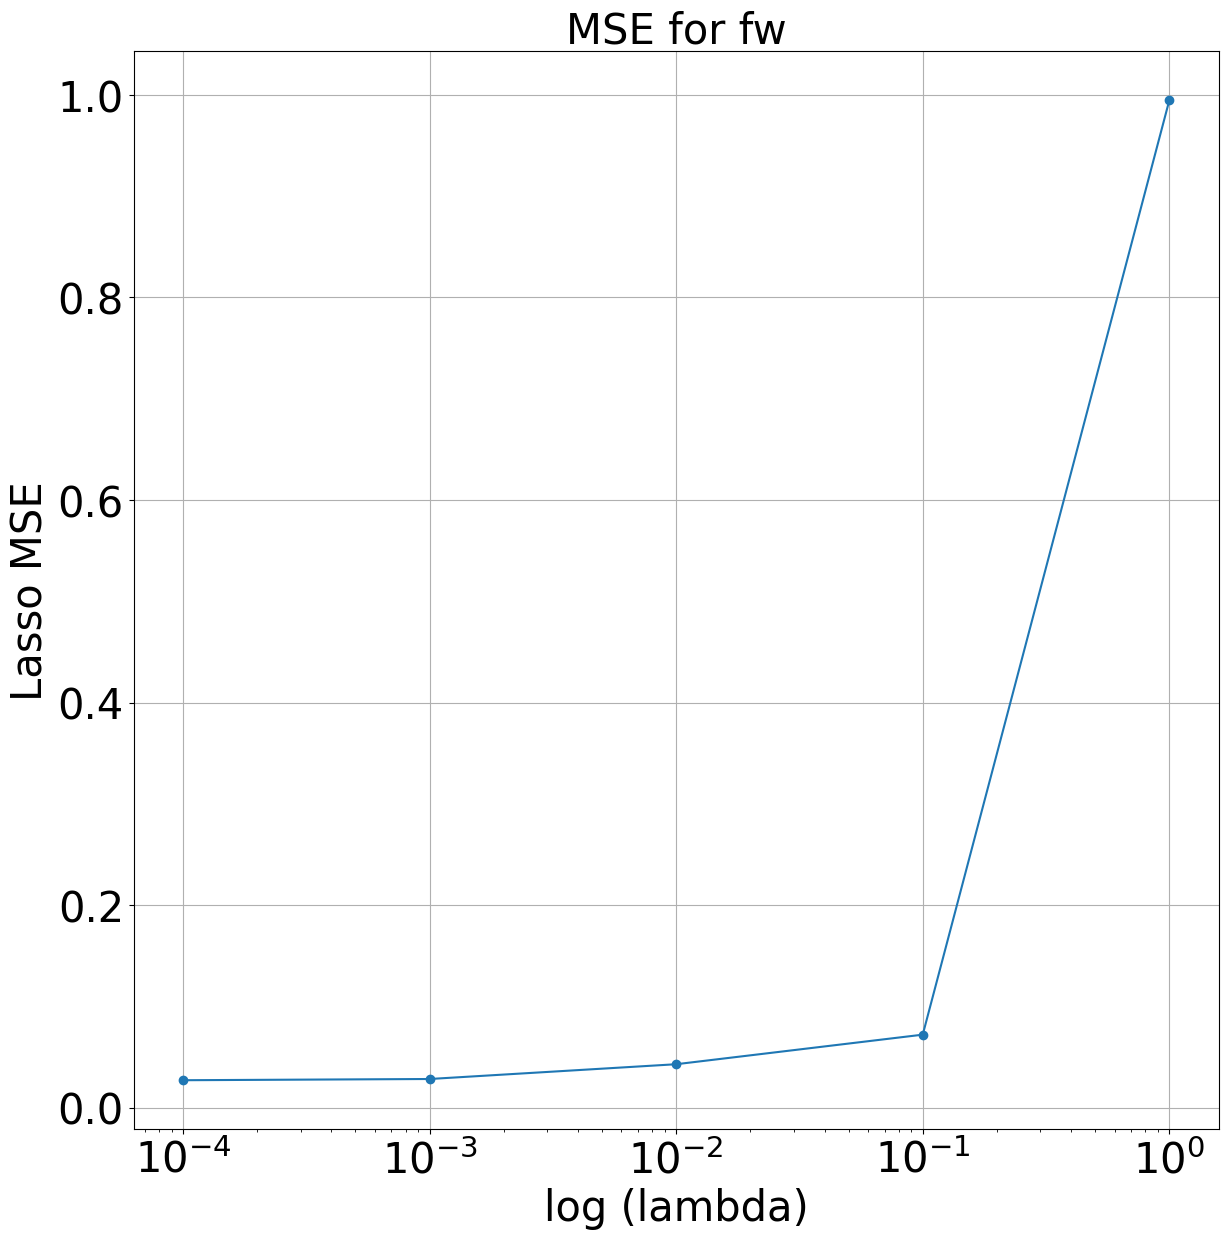

In [27]:
# plt.figure(figsize=8, 4))
plt.figure(figsize=(14, 14))
plt.plot(alpha_values, mean_squared_errors, marker='o', linestyle='-')
plt.title('MSE for fw', fontsize = 30)
plt.xlabel('log (lambda)', fontsize=30)
plt.ylabel('Lasso MSE', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xscale('log')
plt.grid(True)
plt.savefig('MSE fw .png') 
plt.show()

In [23]:
a = 1e-3

In [24]:
model.set_params(alpha=a)
model.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=10000)

In [25]:
coeff = pd.Series(model.coef_, index=features)
coeff

a      1.487313e+00
c     -0.000000e+00
b      3.273012e-01
h      0.000000e+00
t      0.000000e+00
l      7.977452e-02
a/b   -1.410174e-01
a/c    1.055166e-01
c/b    8.234566e-01
t/a   -1.140726e-01
h/a   -3.014494e-15
a^2   -9.273133e-01
b^2   -1.974778e-01
c^2    1.515272e-02
l^2   -5.778294e-02
dtype: float64

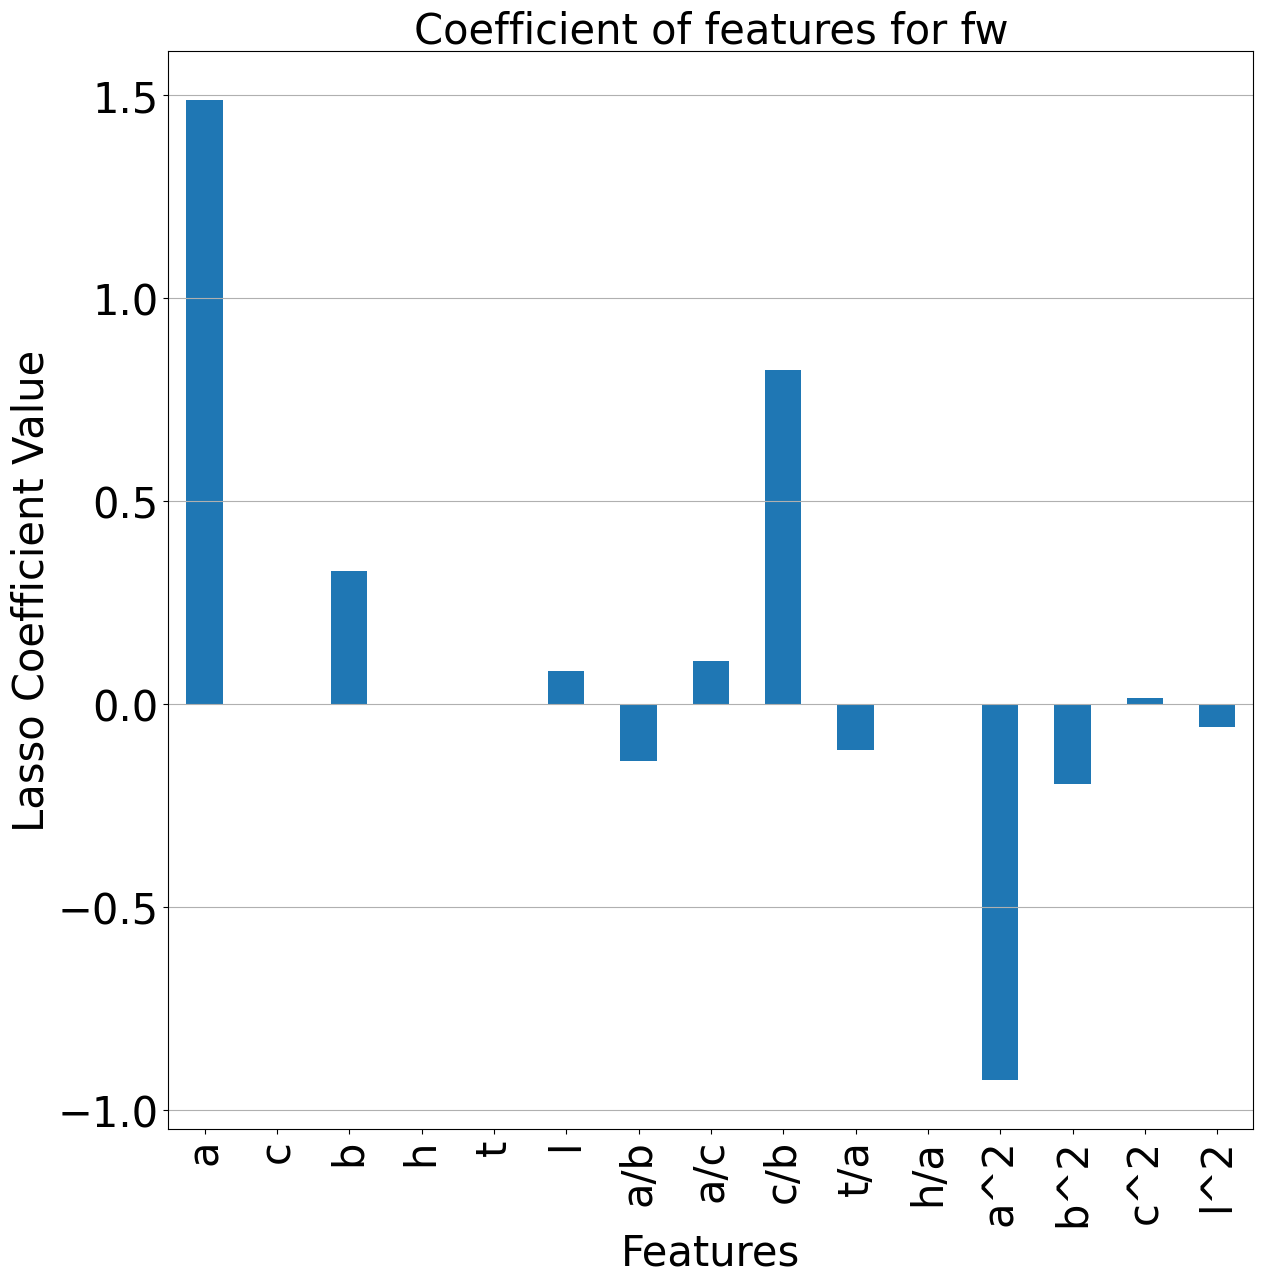

In [28]:
plt.figure(figsize=(14, 14))
coeff.plot(kind='bar')
plt.title('Coefficient of features for fw', fontsize = 30)
plt.xlabel('Features', fontsize = 30)
plt.ylabel('Lasso Coefficient Value', fontsize = 30)
plt.xticks(fontsize = 30, rotation=90)
plt.yticks(fontsize = 30)
plt.grid(axis='y')
plt.savefig('coeff fw.png') 
plt.show()